In [2]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import os
import tensorflow as tf

In [3]:
path = 'data/'
files = [[], []]
samplerates = [[], []]
folder = os.listdir(path)

for marimba, syth in zip(os.listdir(path + folder[0]),  os.listdir(path+folder[1])):
    fn = [marimba, syth]
    for i in range(2):
        samplerate, file = wavfile.read(path + folder[i] +'/' + fn[i])
        files[i].append(np.array(file, dtype=float).T)
        samplerates[i].append(samplerate)

In [4]:
data = [[], []]
sec = 4

for k in range(2):
    for f, s in zip(files[k], samplerates[k]):
        for i in range(0, f.shape[-1] - s * sec, s * sec):
            data[k].append(f[:, i:i + s*sec])
        
marimba, synth = np.array(data)
input_size = (marimba.shape[1], marimba.shape[-1])

In [5]:
input_size

(2, 176400)

In [6]:
samplerate

44100

In [13]:
marimba.shape

(1243, 2, 176400)

In [28]:
len(files[0]) / float(samplerates[0])

1775.4472108843538

In [5]:
x, y = np.random.randn(124, 1700, 2), np.random.randn(124, 1700, 2)

In [6]:
x.shape

(124, 1700, 2)

In [32]:
x[120:130, :, :].shape

(4, 1700, 2)

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

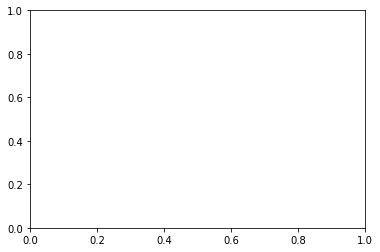

In [26]:
for f, s in zip(files, samplerates):
    times = np.arange(len(f))/float(s)
    
    plt.fill_between(times, f)
    plt.xlim(times[0], times[-1])
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.show()